In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from IPython.display import IFrame, display

In [5]:
file = 'Lectures/Integracion.pdf'
#IFrame(file, width=600, height=400)

In [6]:
def Function(x):
    return np.sin(x)

In [7]:
xi, xf, Npoints = 0., 0.5*np.pi, 10
X = np.linspace(xi,xf, Npoints+1)
Y = Function(X)

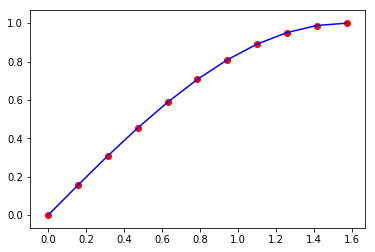

In [10]:
plt.plot(X,Y,'b',label='f(x)')
plt.scatter(X,Y,c='r')

# Implementar regla del trapecio.

In [14]:
# Definamos el metodo del trapecio

def TrapezeMethod(f,X,Y):
    
    h = (X[-1]-X[0])/(len(X)-1)
    
    integral = 0
    
    integral += 0.5*(f(X[0])+f(X[-1]))
    
    for i in X[1:-1]:
        integral += f(i)
        
    integral *= h
    
    return integral, h

In [16]:
Integral, step = TrapezeMethod(Function,X,Y)
print(Integral)
print(step)

0.9979429863543572
0.15707963267948966


In [17]:
# Necesitamos la segunda derivada de f(x)

def ddFunction(f,x,h):
    d = 0
    if(h!=0):
        d = ( f(x+h) - 2*f(x) + f(x-h) ) /h**2
    return d

In [18]:
D2Y = ddFunction(Function,X,0.001)

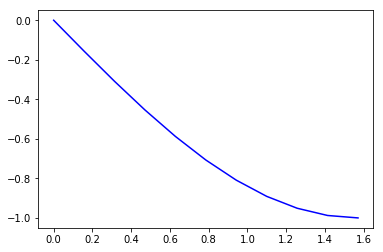

In [19]:
plt.plot(X,D2Y,'b',label='f(x)')

# Error para la regla del trapecio

In [25]:
# Calculando el error

def ErrorTrapezeMethod(X,D2Y):
    D2Y_ = np.array(D2Y)
    #max_ = np.max(D2Y_) Posiblemente f2(x) es cero.
    max_ = np.mean(D2Y_)
    
    error = -(( X[-1]-X[0] )**3 * max_)/(12.*len(X)**2)
    return error

In [26]:
Error = ErrorTrapezeMethod(X,D2Y)
print(Error)

0.001662981862294558


Estimación de $\int_{0}^{\pi/2} sin(x)$ usando la regla del trapecio.

$$ I \approx 0.997 \pm 0.001 $$ 

# Implementar regla de Simpson

In [ ]:
def SimpsonMethod(f,X,Y):
    
    h = (X[-1]-X[0])/(len(X)-1)
    
    integral = 0
    
    integral += f(X[0])+f(X[-1])
    
    for i in range(len(X[1:-1])):
        
        if (i%2 == 0):
            integral += 4.*f(X[i+1])
            
        else:
            integral += 2.*f(X[i+1])
            
    integral *= h/3. 
    
    return integral, h

In [30]:
Integral, step = SimpsonMethod(Function,X,Y)
print(Integral, step)

(1.0000033922209004, 0.15707963267948966)


# Error para la regla de Simpson

In [54]:
# Implementando la cuarta derivada

def D4Derivative(f,x,h):
    d = 0
    if(h!=0):
        d = (f(x+2.*h) - 4*f(x+h) + 6*f(x) - 4*f(x-h) + f(x-2.*h))/h**4

    return d

In [55]:
D4Y = D4Derivative(Function,X,0.001)

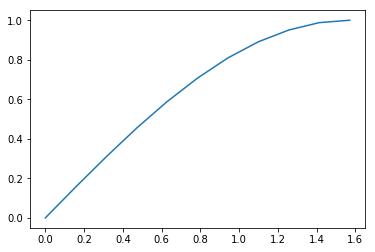

In [56]:
plt.plot(X,D4Y)

In [58]:
D4Y_ = np.array(D4Y)
mean = np.mean(D4Y_)

error = ((X[-1]-X[0])*(mean*step**4))/180.
print(error)

3.310070044230331e-06


Estimación de $\int_{0}^{\pi/2} sin(x)$ usando la regla de Simpson 1/3.

$$ I \approx 1.000003 \pm 0.000003 $$ 